In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Nutrition Physical Activity and Obesity Statistics

This EDA will study general trends in nutrition, physical activity, and obesity. Due to these metrics' studied associations with the consumption of processed foods, analyzing these trends over time can provide insights into public health patterns.

We perform the following analyses:

* Time Series Analysis: Identify trends over time at both the national and state levels.
* Distribution and Box Plot Analysis: Examine the distribution and variability of the data.
* Bar Chart Analysis: Compare average values across years.

### Step 1 - Data Processing

In [13]:
file_path = 'Nutrition_Physical_Activity_and_Obesity_Data.csv' 

def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    
    df.dropna(subset=['Data_Value', 'YearStart', 'YearEnd', 'LocationDesc', 'Question', 'Sample_Size'], inplace=True)
    
    df['YearStart'] = df['YearStart'].astype(int)
    df['YearEnd'] = df['YearEnd'].astype(int)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'], errors='coerce')
    df['Sample_Size'] = pd.to_numeric(df['Sample_Size'], errors='coerce')
    
    df = df[['YearStart', 'LocationDesc', 'Topic', 'Data_Value', 'Sample_Size']]
    
    return df

df = load_and_clean_data(file_path)
df

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/910786005.py:4: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,YearStart,LocationDesc,Topic,Data_Value,Sample_Size
0,2019,Alaska,Physical Activity - Behavior,9.6,130.0
1,2019,Arizona,Obesity / Weight Status,13.3,1739.0
2,2019,District of Columbia,Obesity / Weight Status,17.1,8978.0
3,2019,Illinois,Physical Activity - Behavior,65.9,876.0
4,2019,Maryland,Obesity / Weight Status,16.7,2573.0
...,...,...,...,...,...
133340,2022,Wyoming,Obesity / Weight Status,24.5,111.0
133341,2022,Wyoming,Physical Activity - Behavior,36.0,159.0
133342,2022,Wyoming,Obesity / Weight Status,35.2,450.0
133343,2022,Wyoming,Obesity / Weight Status,35.3,512.0


In [20]:
def print_unique_topics(df):
    unique_topics = df['Topic'].unique()
    print("List of all unique topics in the dataset:")
    for topic in unique_topics:
        print(topic)

print_unique_topics(df)

List of all unique topics in the dataset:
Physical Activity - Behavior
Obesity / Weight Status
Sugar Drinks - Behavior
Fruits and Vegetables - Behavior
Television Viewing - Behavior


In [15]:
def eda(df):
    print("Basic Information about the dataset:")
    print(df.info())
    
    print("\nSummary Statistics:")
    print(df.describe())
    
    print("\nMissing Values:")
    print(df.isnull().sum())

eda(df)

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 113474 entries, 0 to 133344
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YearStart     113474 non-null  int64  
 1   LocationDesc  113474 non-null  object 
 2   Topic         113474 non-null  object 
 3   Data_Value    113474 non-null  float64
 4   Sample_Size   113474 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ MB
None

Summary Statistics:
           YearStart     Data_Value    Sample_Size
count  113474.000000  113474.000000  113474.000000
mean     2015.021635      29.949246    3048.032501
std         4.464095      10.982698   16157.532701
min      2001.000000       0.000000      50.000000
25%      2012.000000      21.800000     453.000000
50%      2015.000000      30.100000     969.000000
75%      2019.000000      36.900000    2097.000000
max      2022.000000      81.900000  476876.000000

Mi

### Step 2 - Time-Series Trends, Distributions, and Comparisons on the National Level

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/59050470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby('YearStart').apply(lambda x: pd.Series({


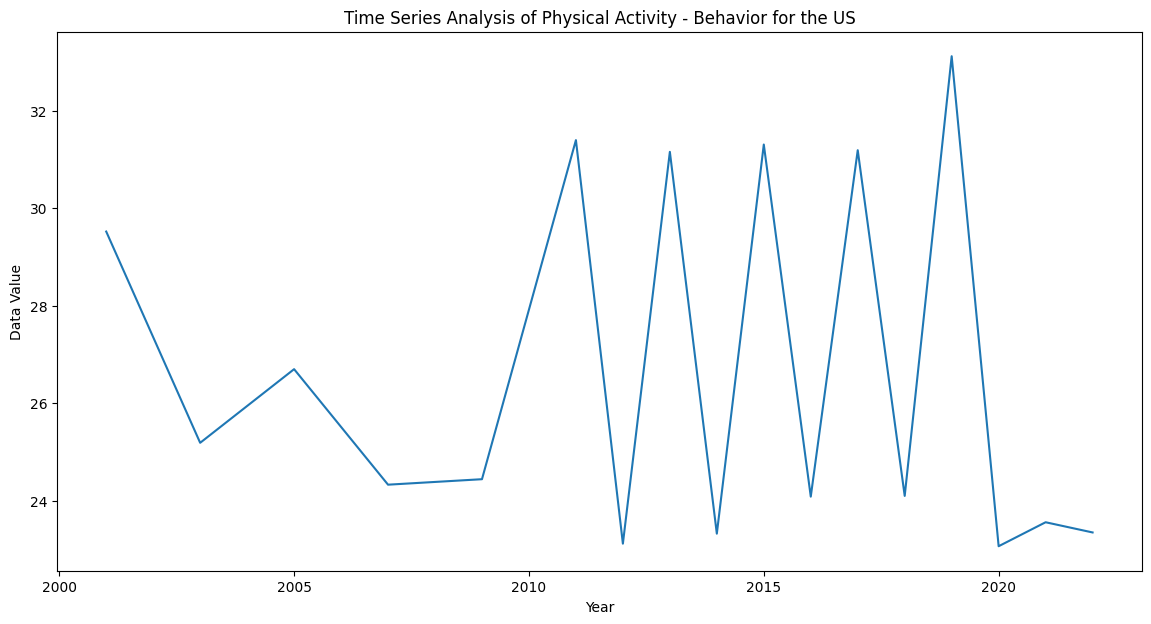

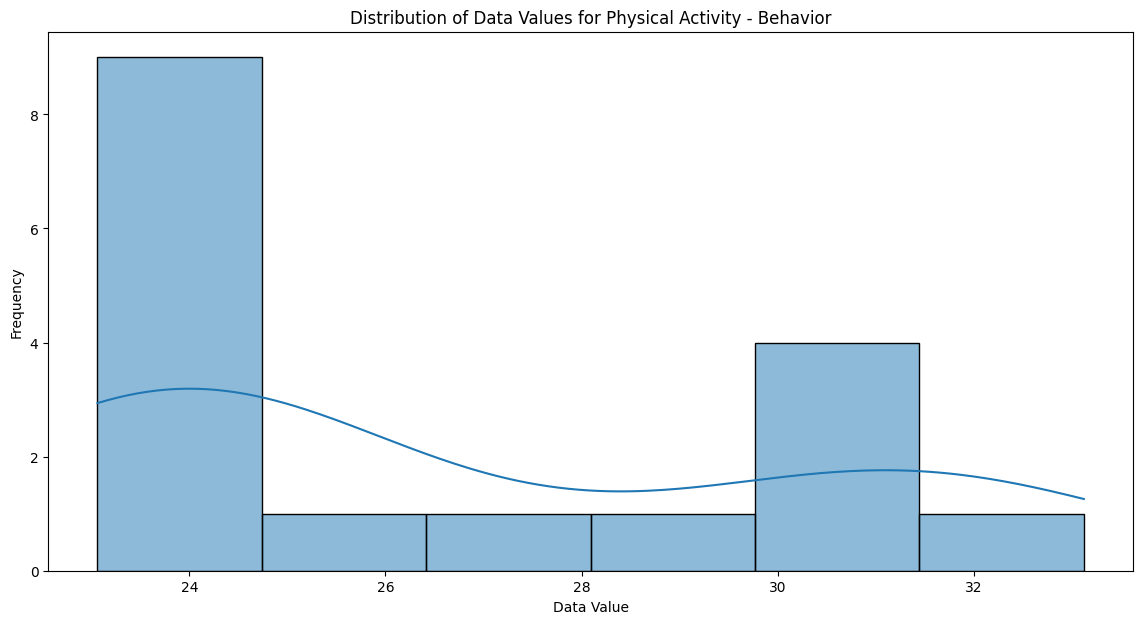

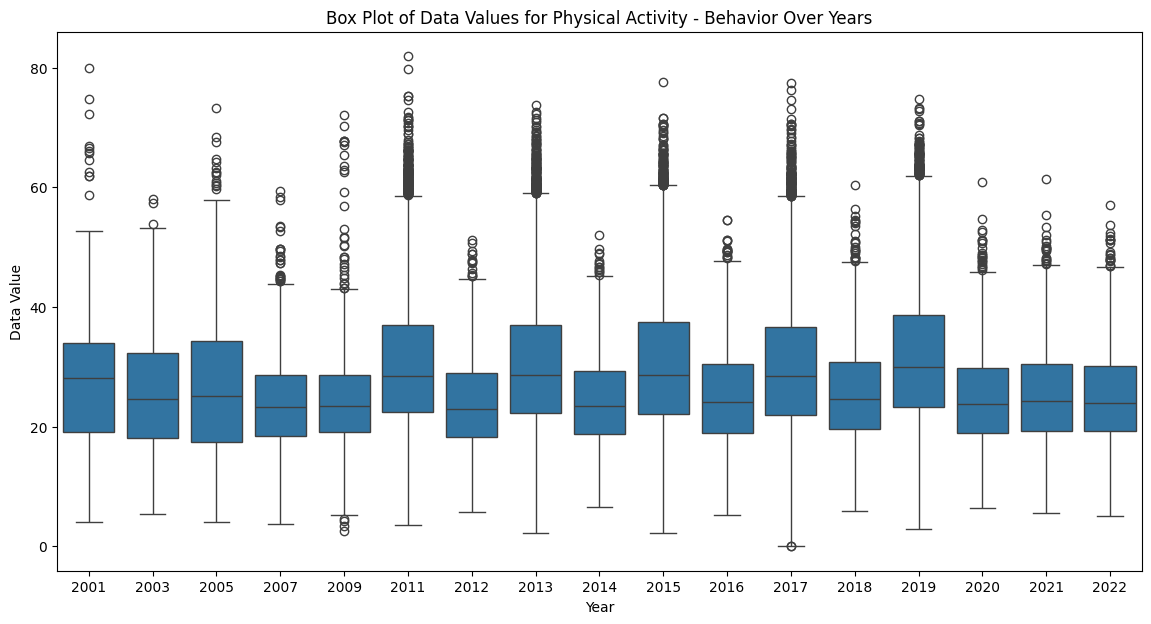

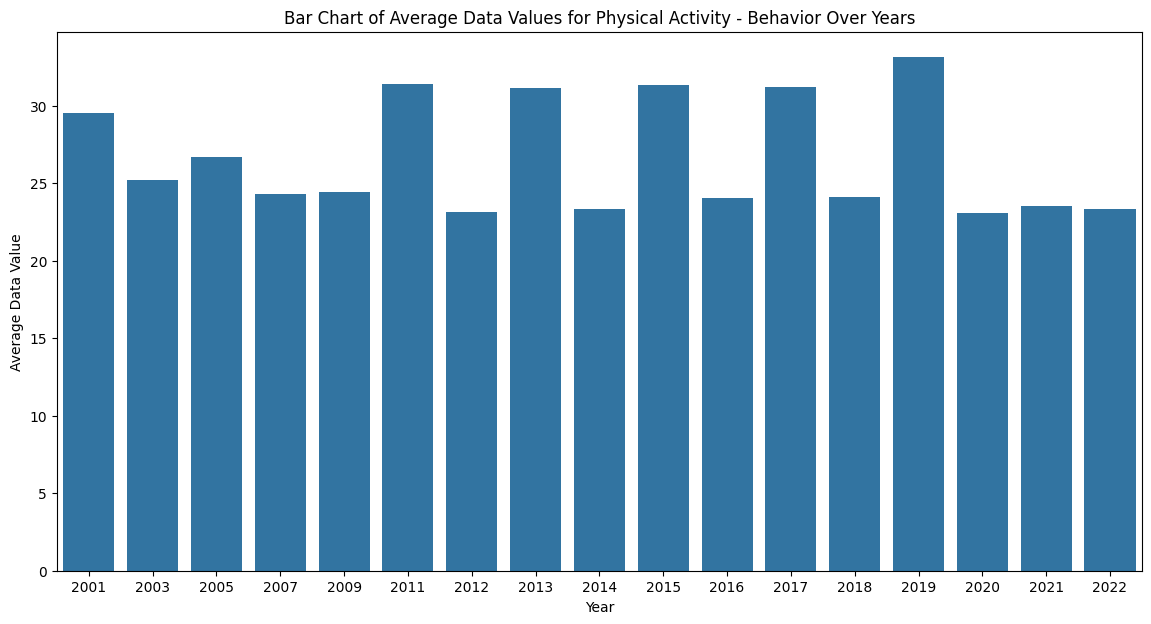

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/59050470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby('YearStart').apply(lambda x: pd.Series({


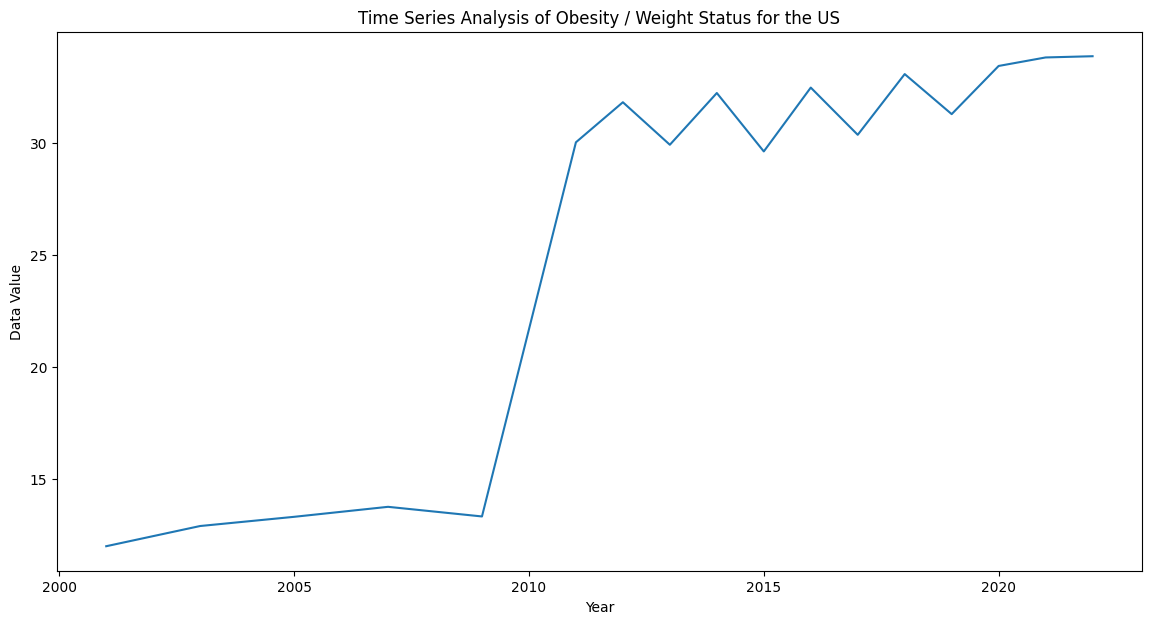

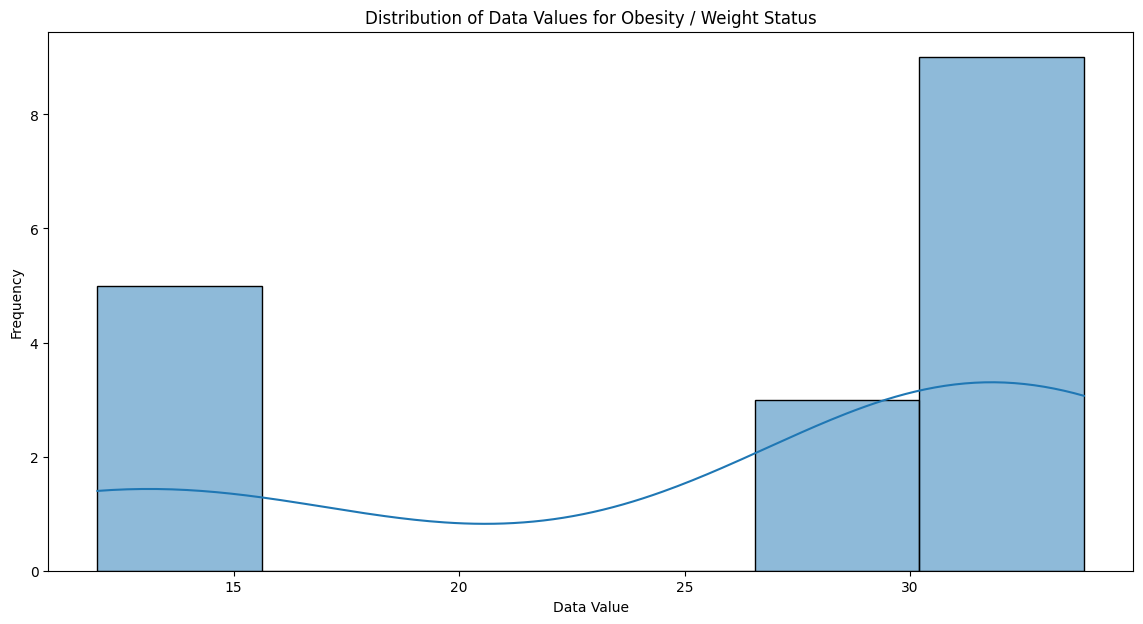

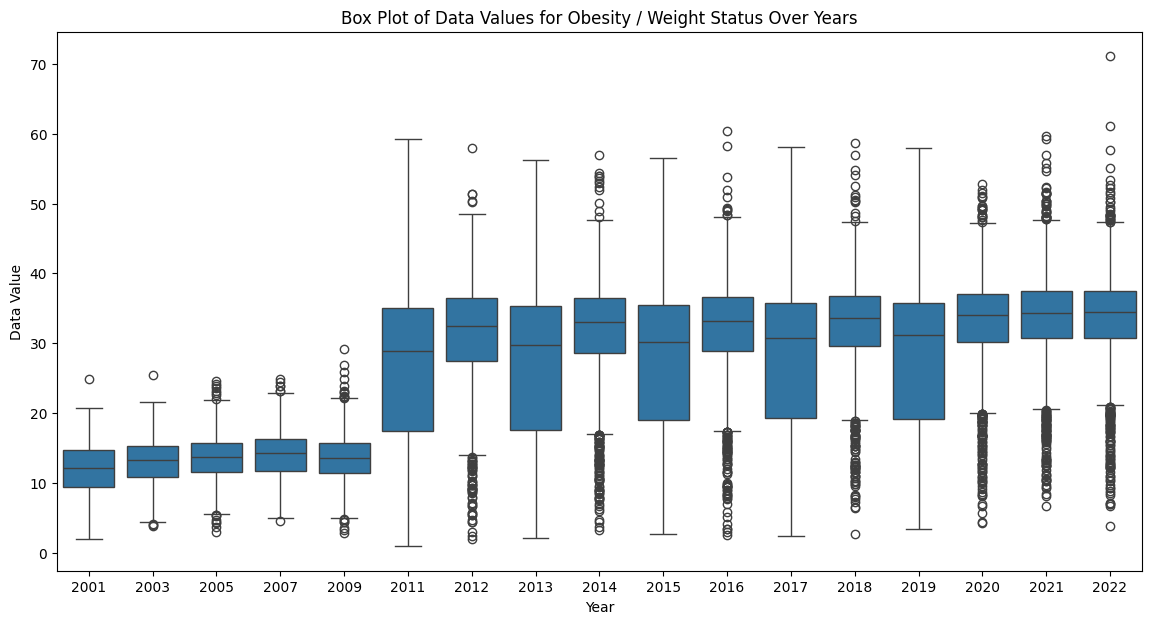

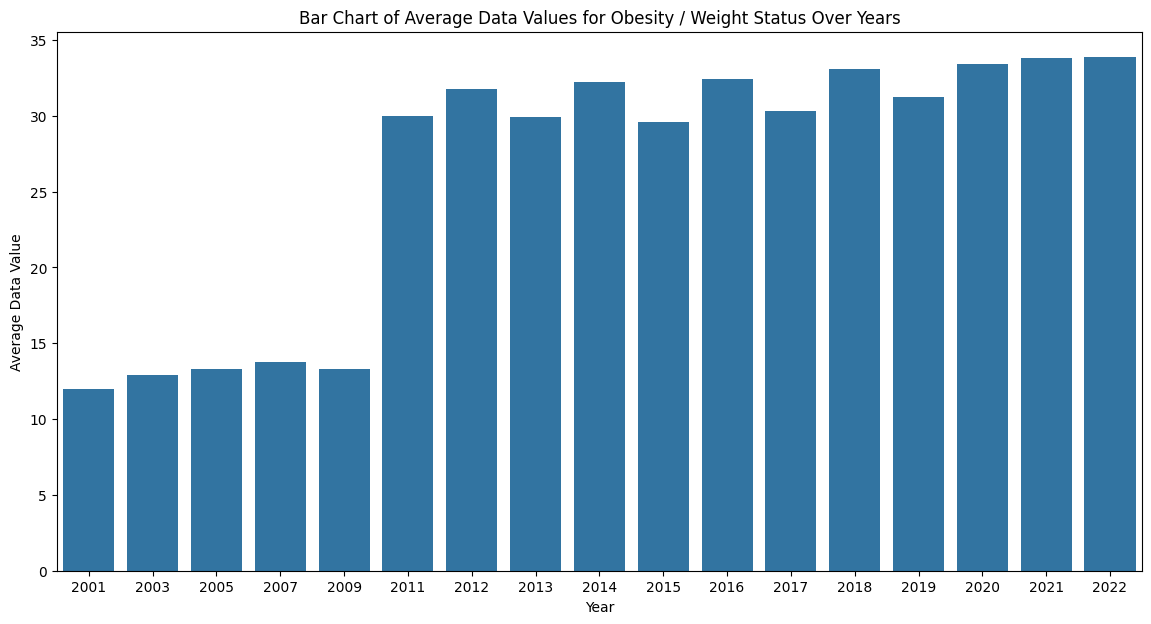

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/59050470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby('YearStart').apply(lambda x: pd.Series({


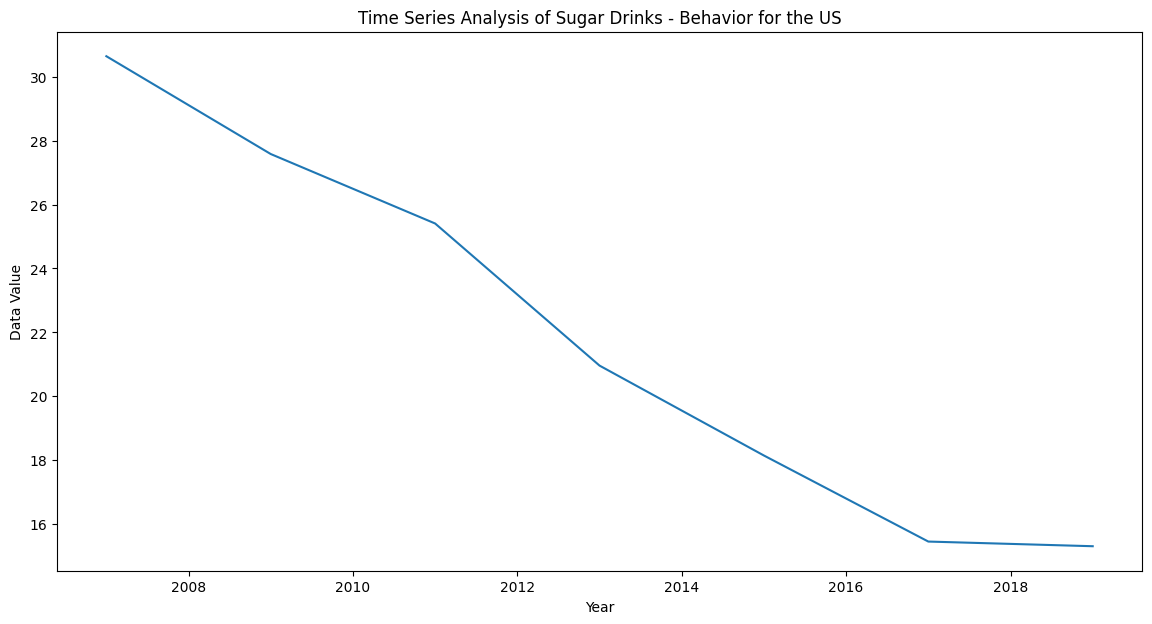

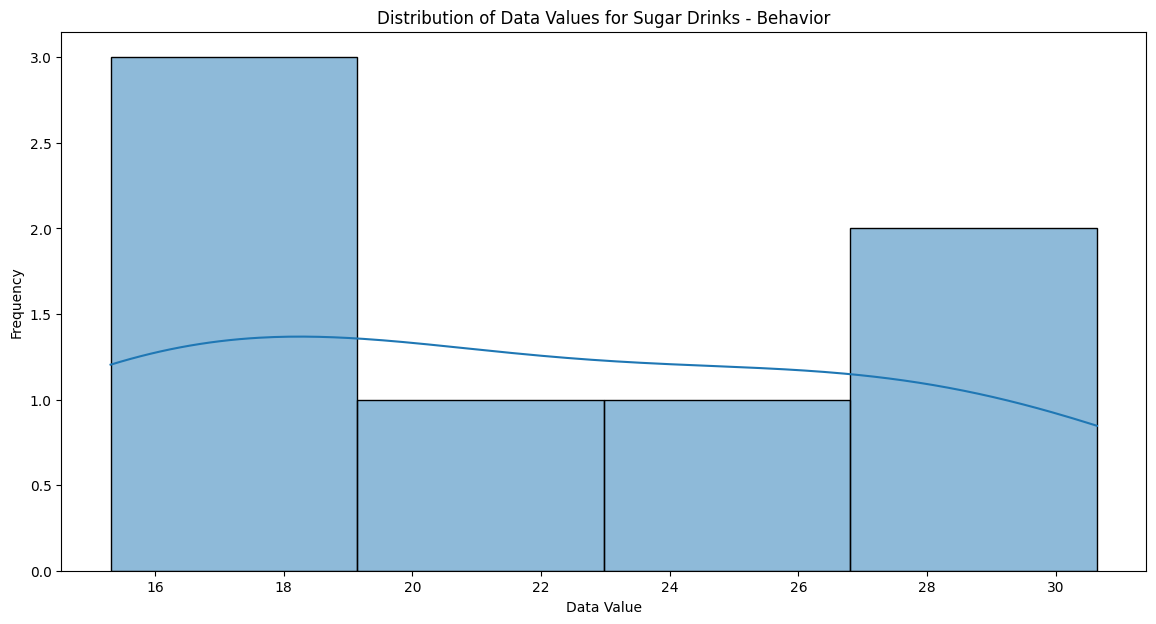

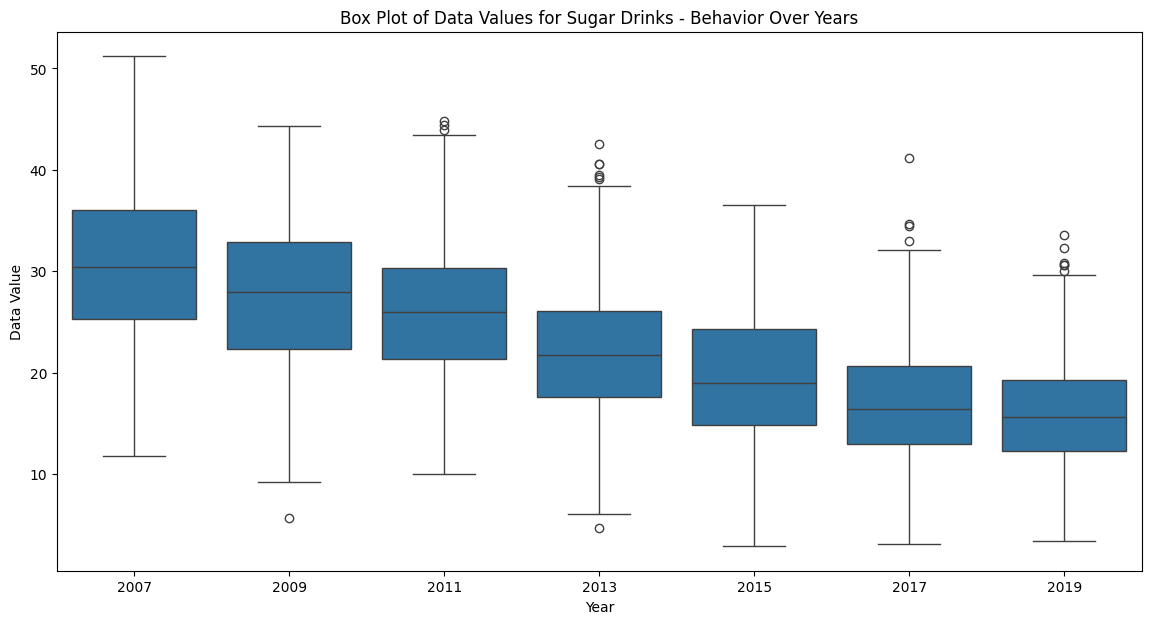

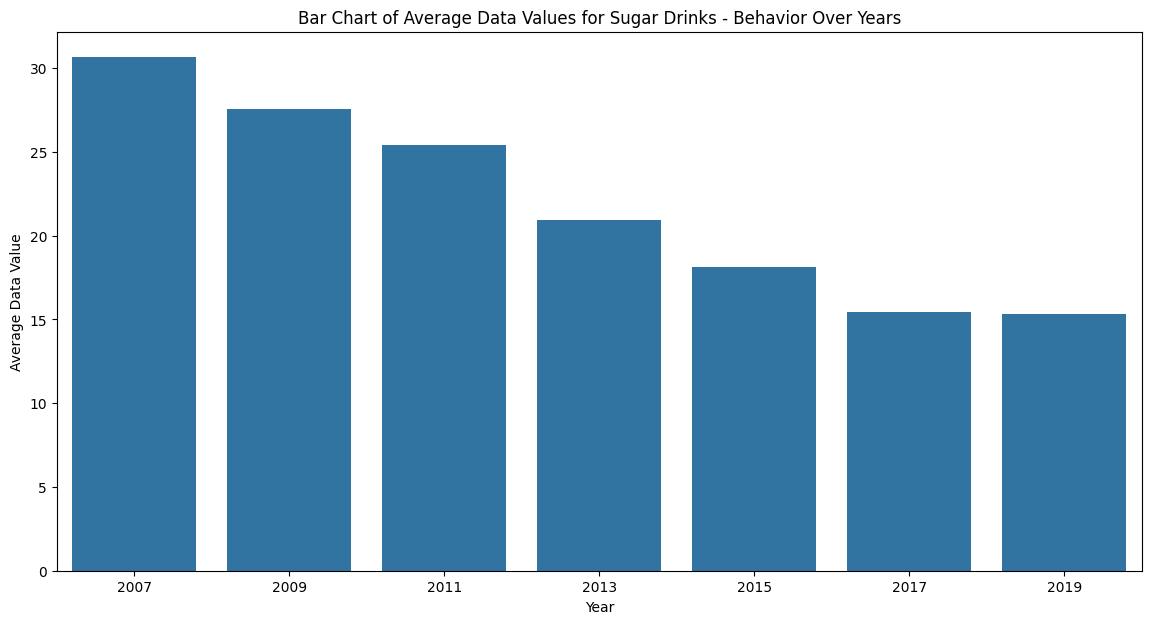

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/59050470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby('YearStart').apply(lambda x: pd.Series({


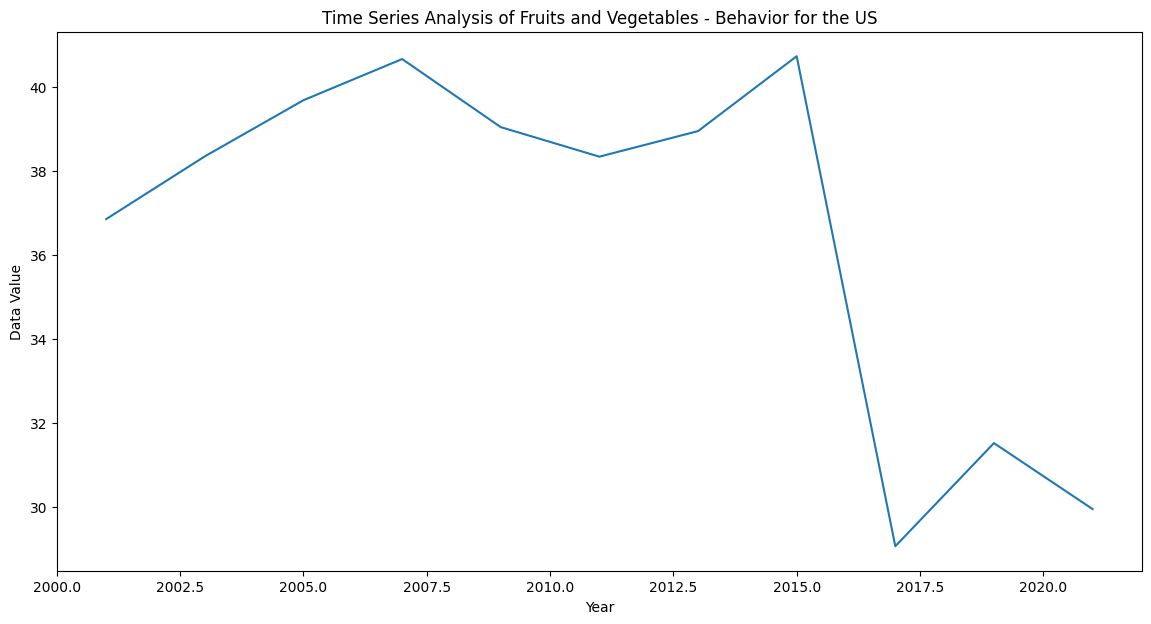

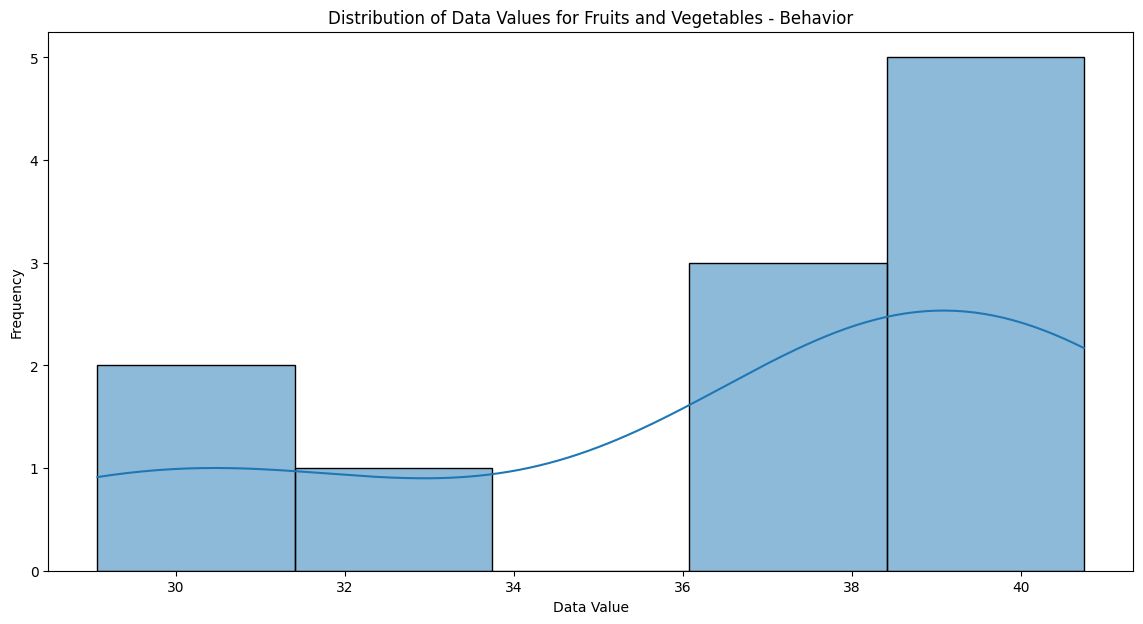

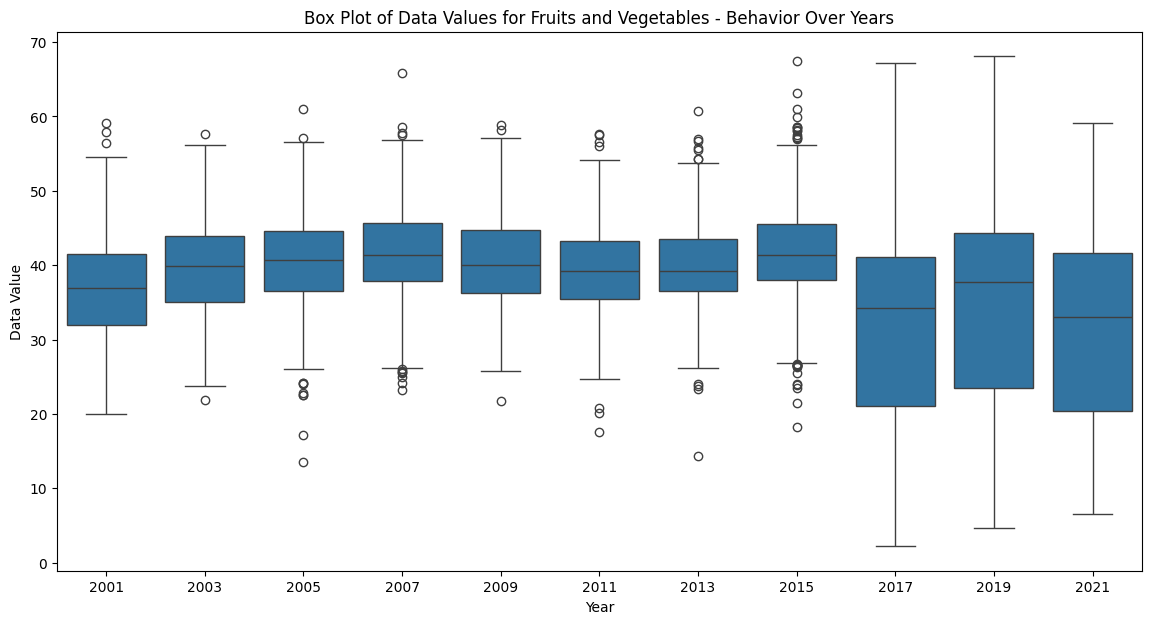

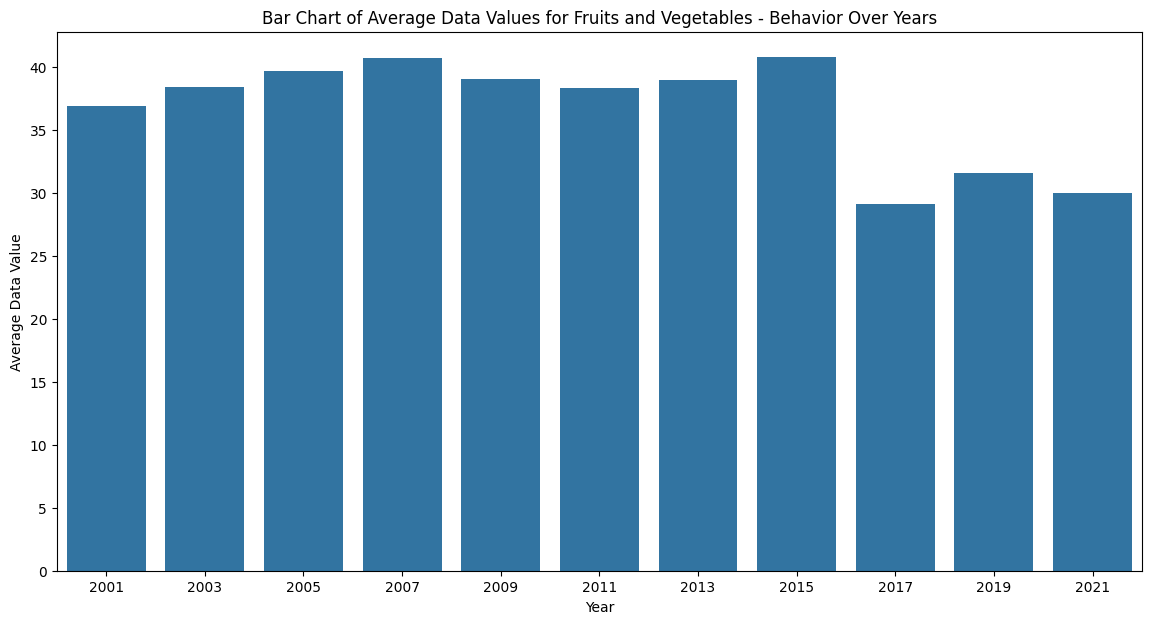

In [26]:
def weighted_mean(df, value_col, weight_col):
    d = df[value_col]
    w = df[weight_col]
    return (d * w).sum() / w.sum()

def visualize_data(df, topics):
    for topic in topics:
        topic_df = df[df['Topic'] == topic]
        grouped = topic_df.groupby('YearStart').apply(lambda x: pd.Series({
            'Data_Value': weighted_mean(x, 'Data_Value', 'Sample_Size'),
            'Sample_Size': x['Sample_Size'].sum()
        })).reset_index()
        
        # Time Series Analysis
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=grouped, x='YearStart', y='Data_Value', errorbar=None)
        title = f'Time Series Analysis of {topic} for the US'
        plt.title(title)
        plt.xlabel('Year')
        plt.ylabel('Data Value')
        plt.show()

        #distribution
        plt.figure(figsize=(14, 7))
        sns.histplot(grouped['Data_Value'], kde=True)
        plt.title(f'Distribution of Data Values for {topic}')
        plt.xlabel('Data Value')
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(14, 7))
        sns.boxplot(data=topic_df, x='YearStart', y='Data_Value')
        plt.title(f'Box Plot of Data Values for {topic} Over Years')
        plt.xlabel('Year')
        plt.ylabel('Data Value')
        plt.show()

        # Bar Chart Analysis for the entire US
        plt.figure(figsize=(14, 7))
        sns.barplot(data=grouped, x='YearStart', y='Data_Value')
        plt.title(f'Bar Chart of Average Data Values for {topic} Over Years')
        plt.xlabel('Year')
        plt.ylabel('Average Data Value')
        plt.show()
        

topics = ['Physical Activity - Behavior', 'Obesity / Weight Status', 'Sugar Drinks - Behavior', 'Fruits and Vegetables - Behavior'] 
visualize_data(df, topics)

### Step 3 - Time Series Trends on the State Level

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/903179916.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby(['YearStart', 'LocationDesc']).apply(lambda x: pd.Series({


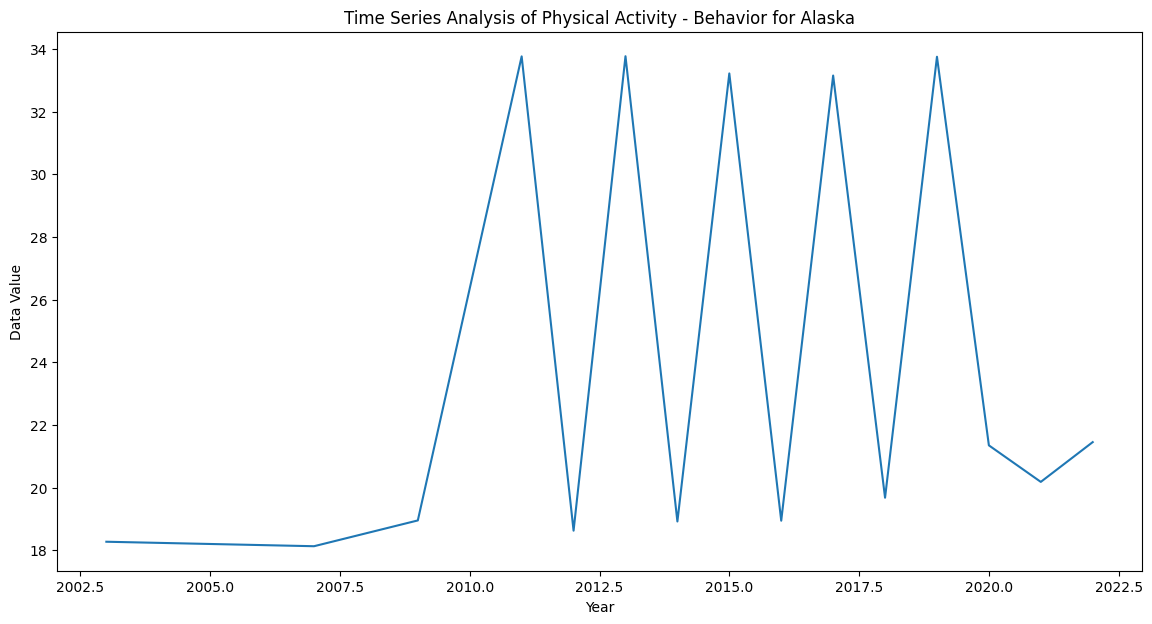

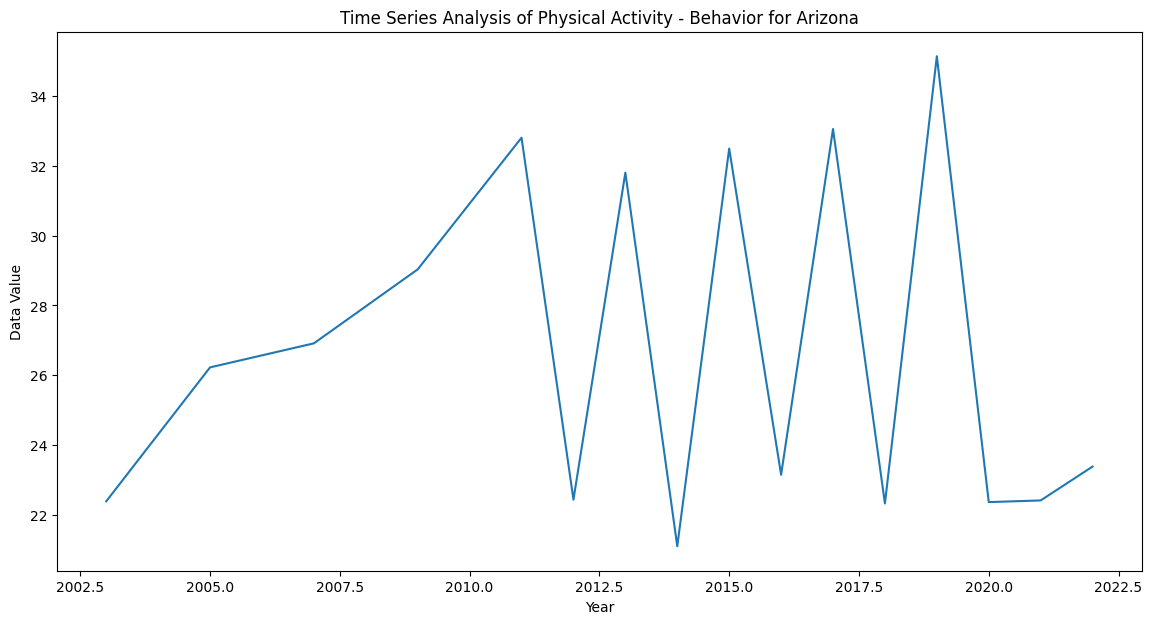

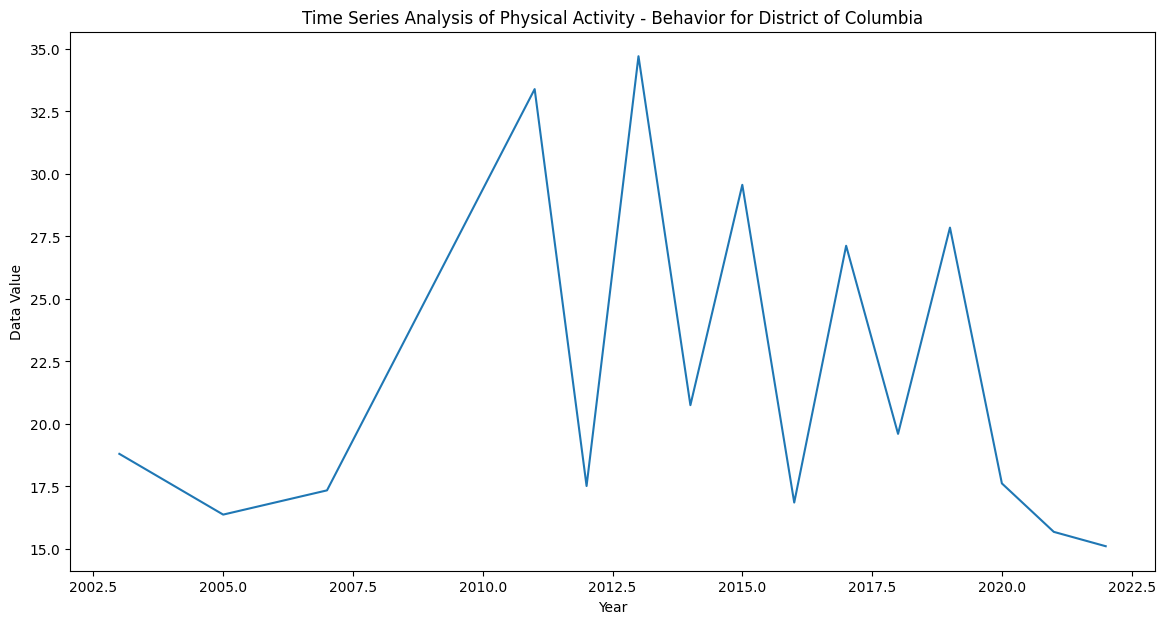

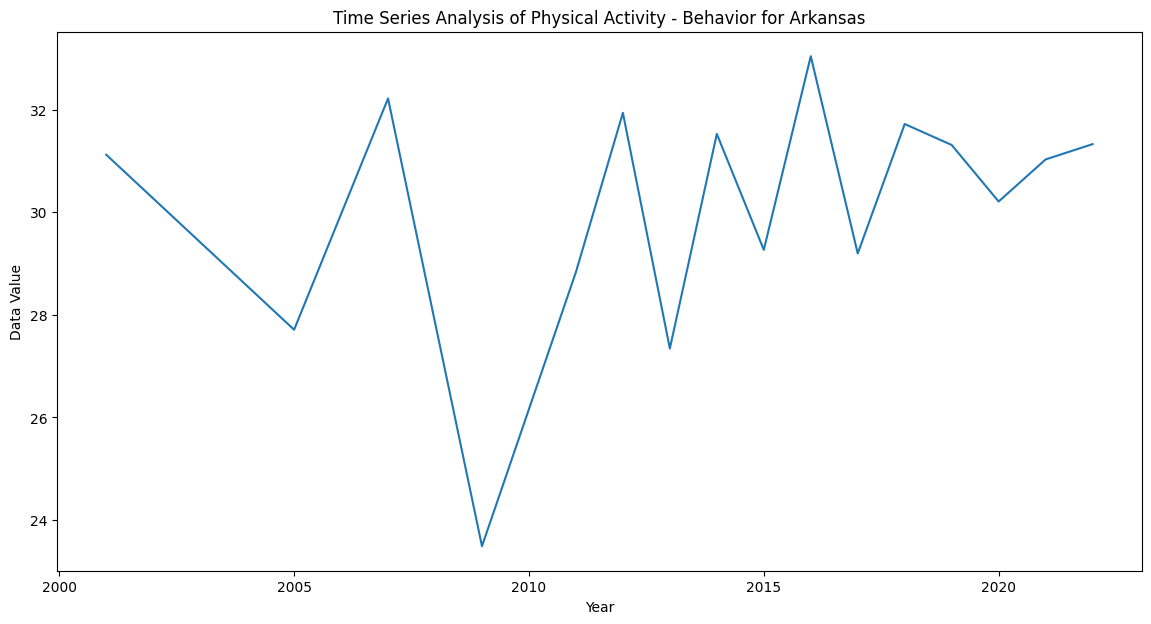

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/903179916.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby(['YearStart', 'LocationDesc']).apply(lambda x: pd.Series({


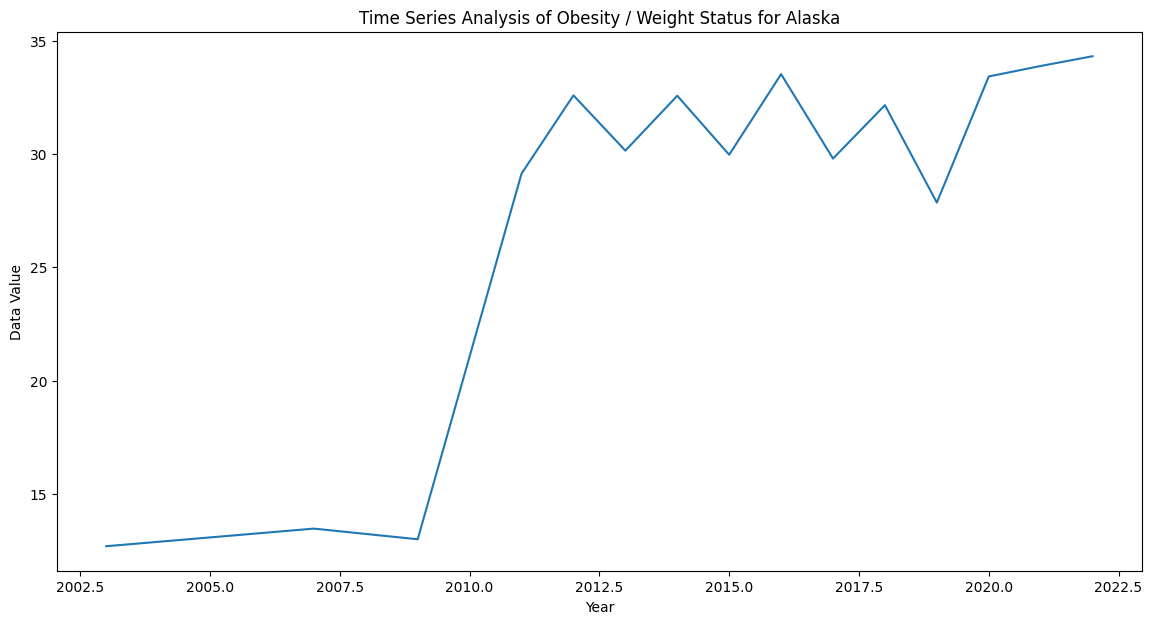

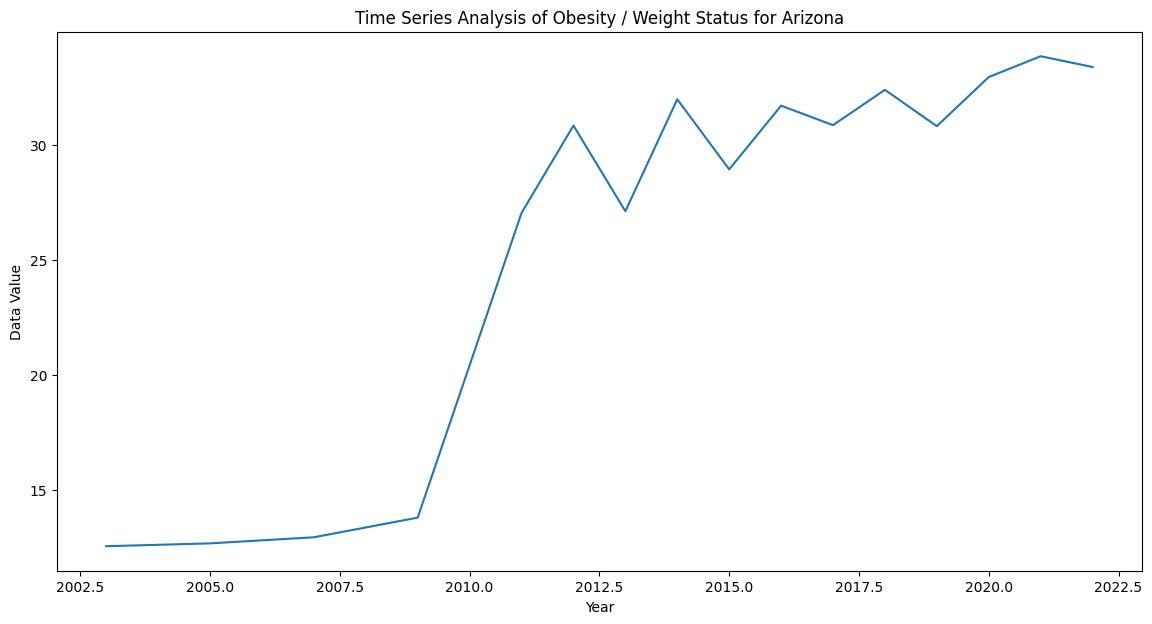

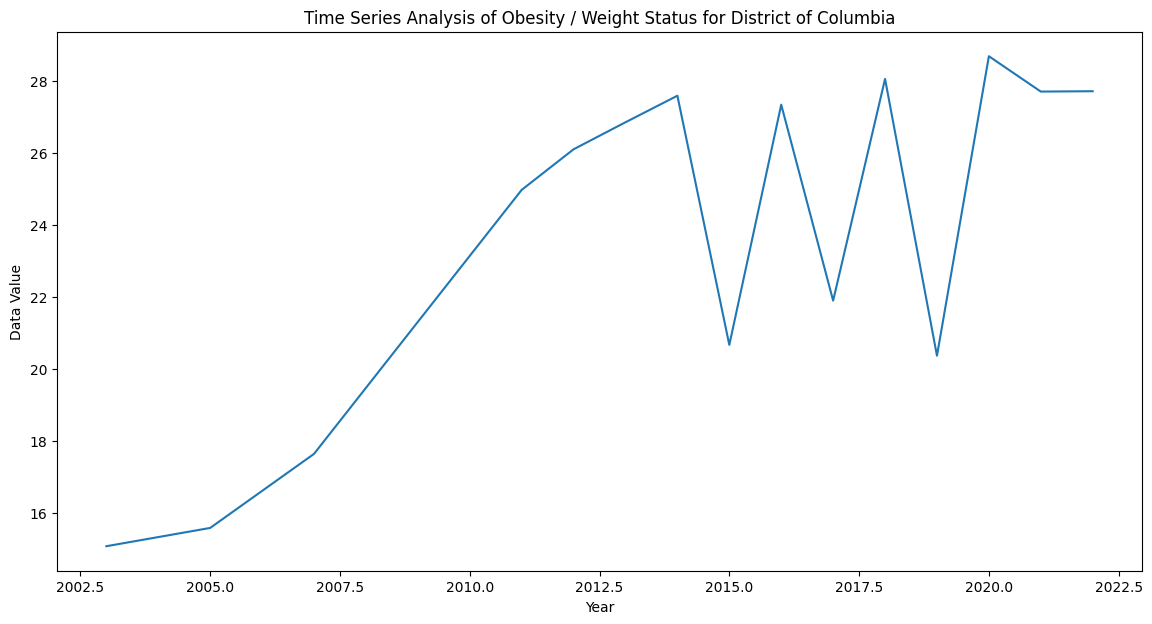

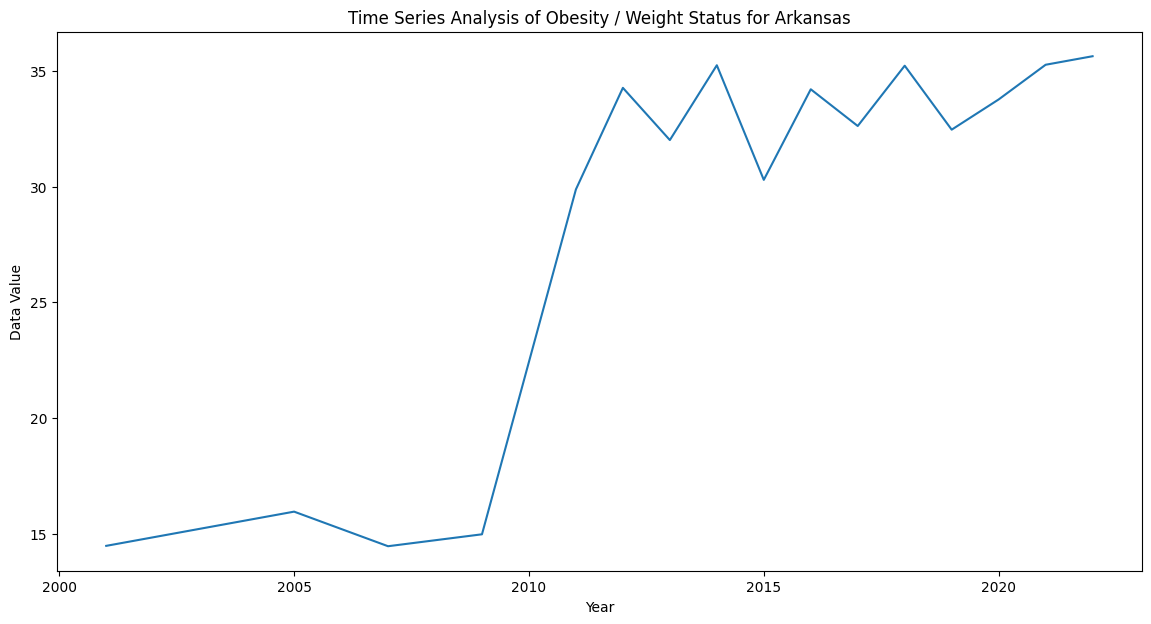

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/903179916.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby(['YearStart', 'LocationDesc']).apply(lambda x: pd.Series({


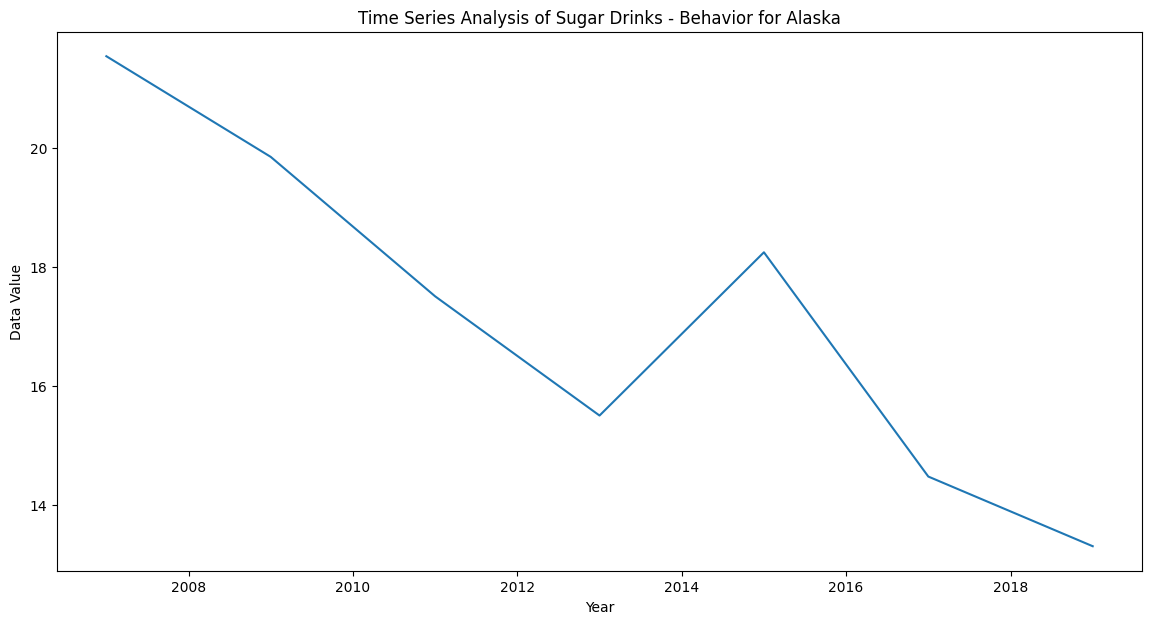

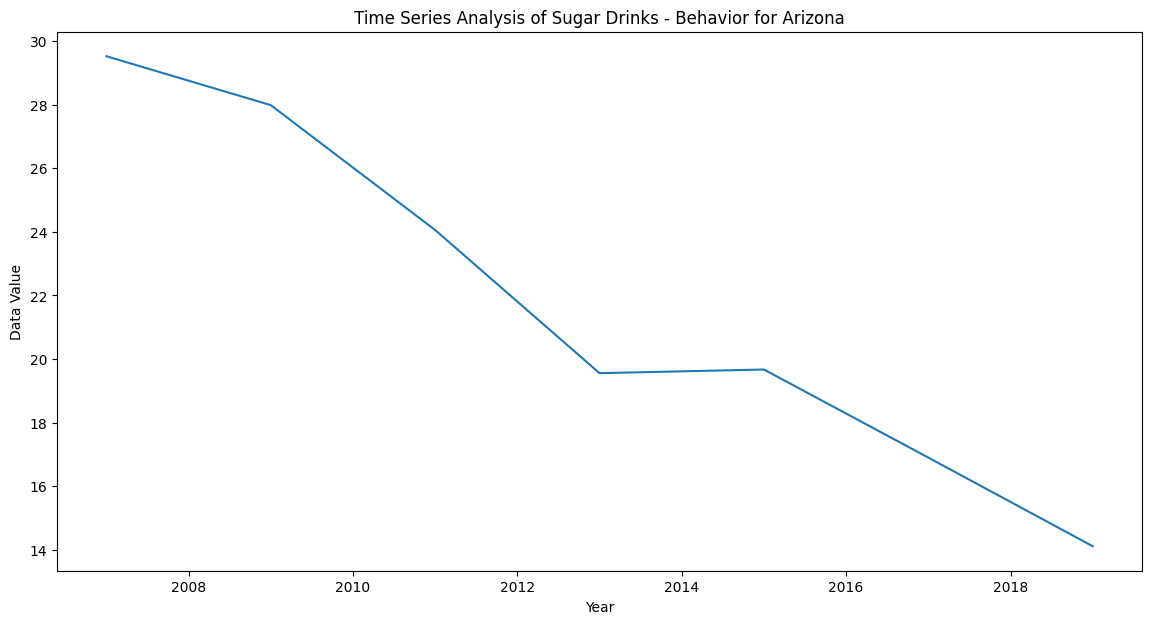

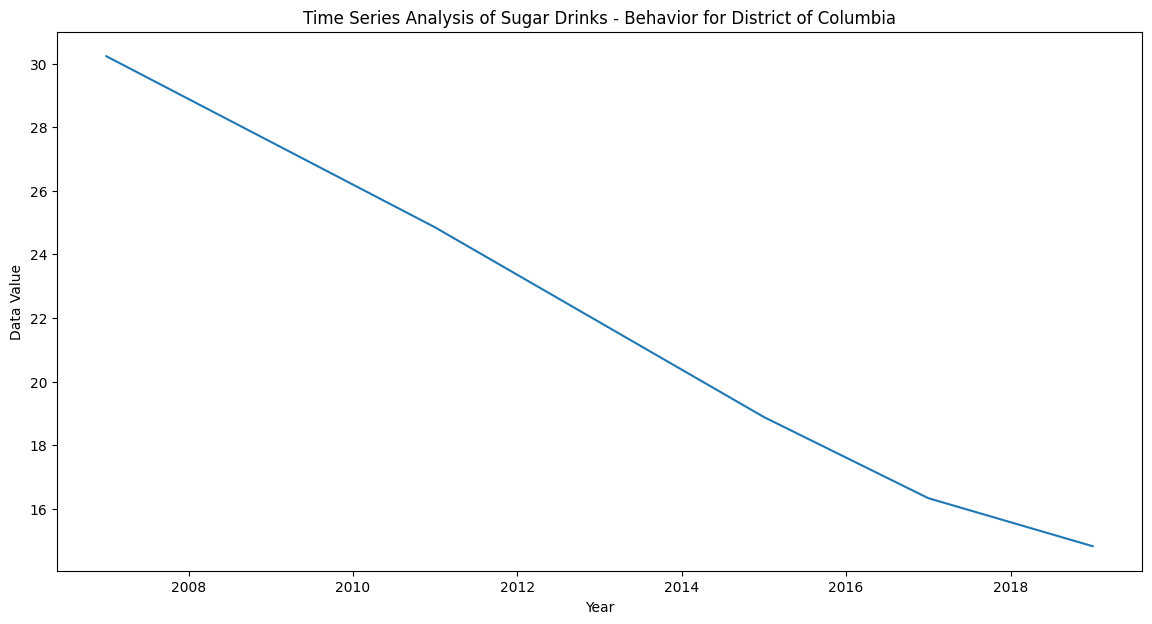

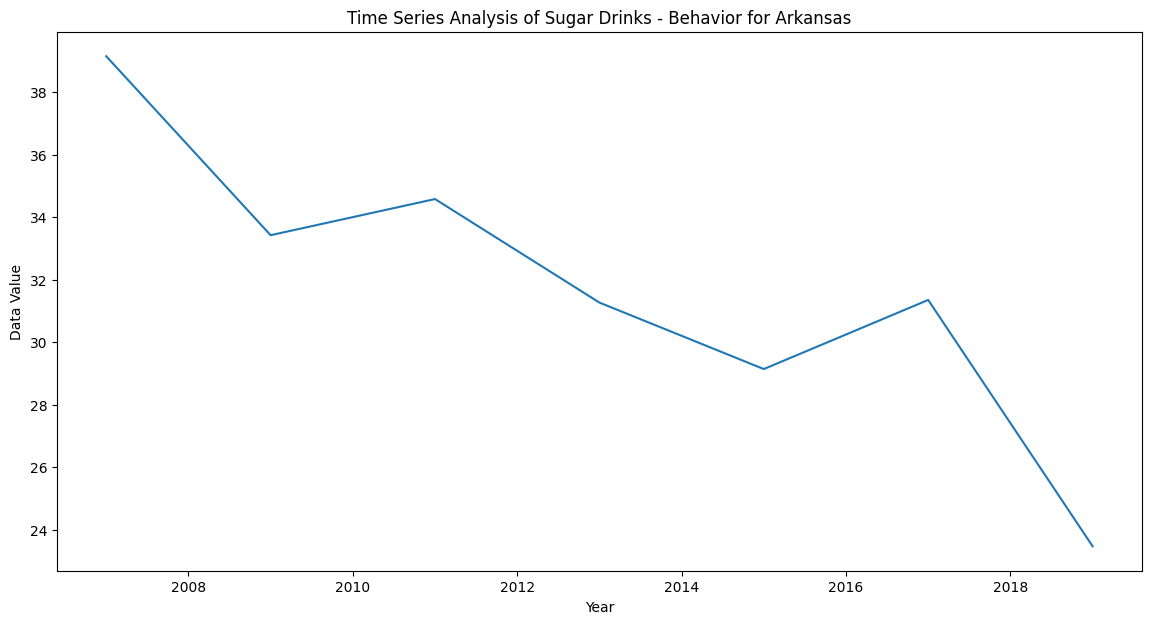

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_65559/903179916.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = topic_df.groupby(['YearStart', 'LocationDesc']).apply(lambda x: pd.Series({


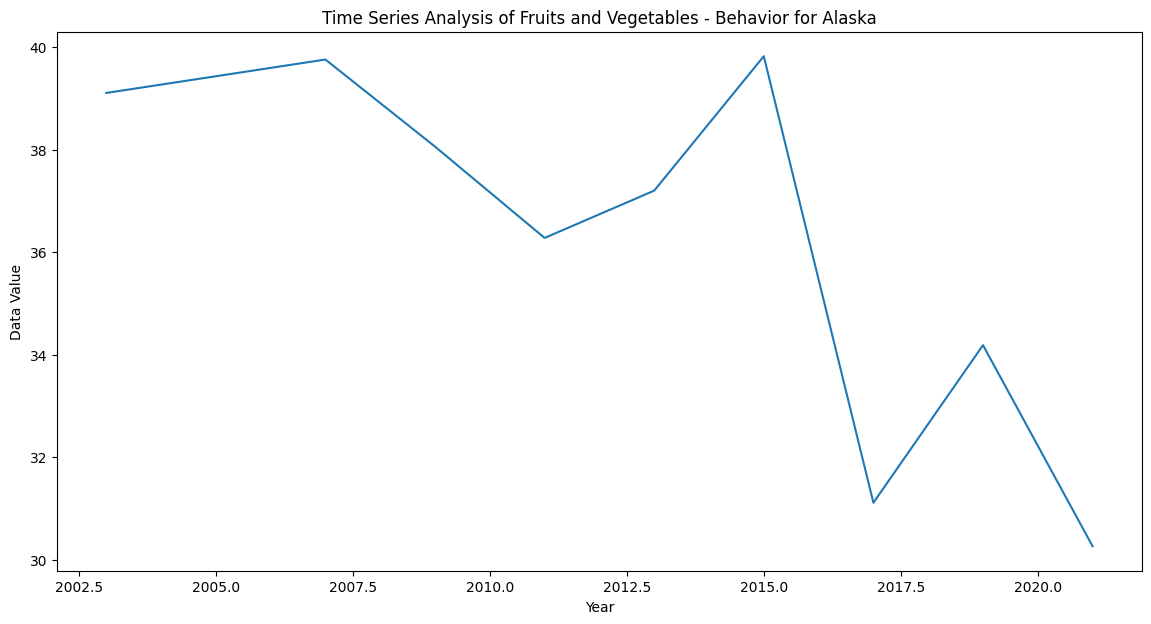

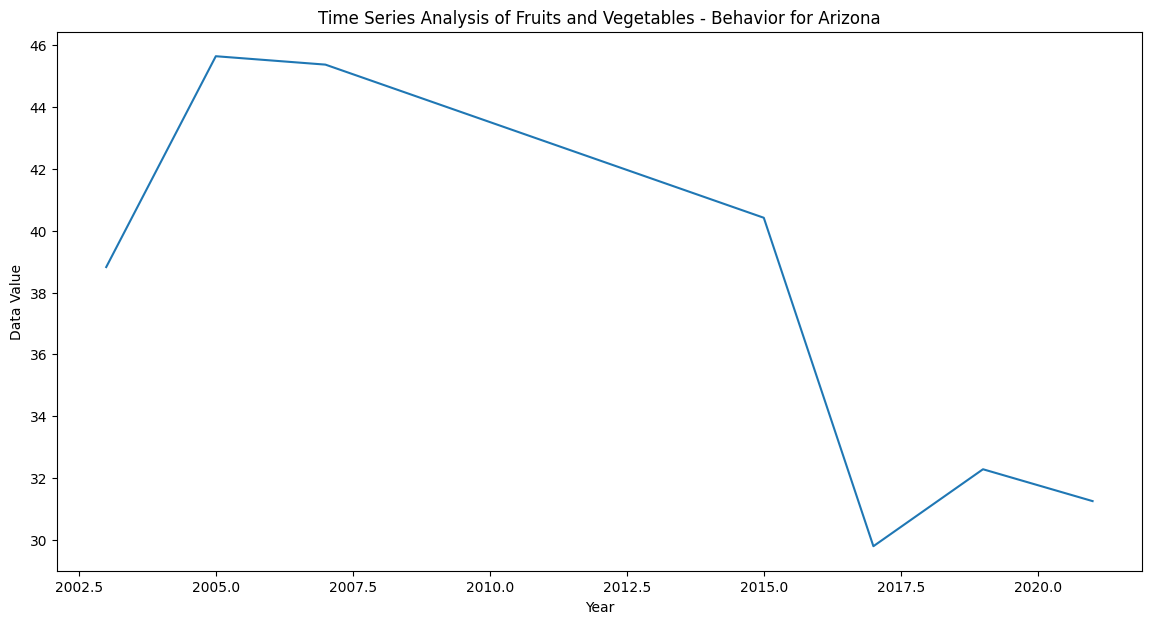

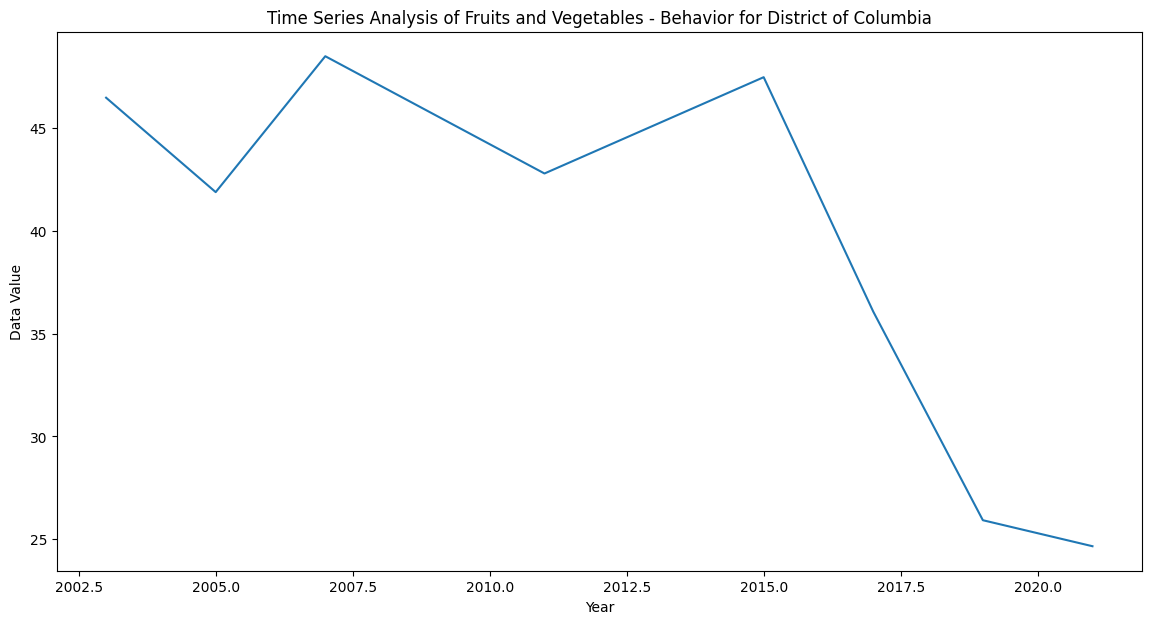

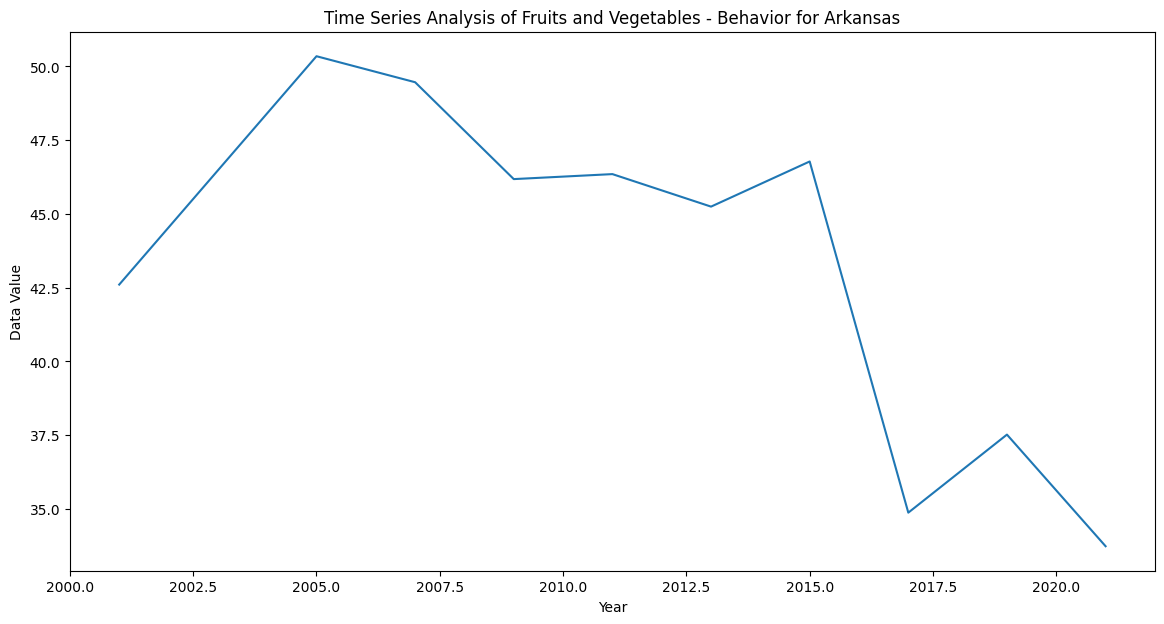

In [21]:
def visualize_data_by_state(df, states, topics):
    for topic in topics:
        topic_df = df[df['Topic'] == topic]
        grouped = topic_df.groupby(['YearStart', 'LocationDesc']).apply(lambda x: pd.Series({
            'Data_Value': weighted_mean(x, 'Data_Value', 'Sample_Size'),
            'Sample_Size': x['Sample_Size'].sum()
        })).reset_index()
        
        # if you want every state you can do this:
        #states = grouped['LocationDesc'].unique()
        for state in states:
            state_df = grouped[grouped['LocationDesc'] == state]
            
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=state_df, x='YearStart', y='Data_Value', errorbar=None)
            title = f'Time Series Analysis of {topic} for {state}'
            plt.title(title)
            plt.xlabel('Year')
            plt.ylabel('Data Value')
            plt.show()


states = ['Alaska', 'Arizona', 'District of Columbia', 'Arkansas']
visualize_data_by_state(df, states, topics)